In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage
# from skimage.io import imsave


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [12]:
path = "/home/agung/PythonProject/Flask/photographite_backend/media/temp/Agung/"
name = "20181115210859498321.jpg"
img = path+name
img

'/home/agung/PythonProject/Flask/photographite_backend/media/temp/Agung/20181115210859498321.jpg'

In [13]:
tes = imageio.imread(img)
tes

Array([[[ 7,  0,  1],
        [12,  3,  4],
        [18,  8,  9],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[ 9,  0,  3],
        [12,  3,  4],
        [17,  7,  8],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[ 9,  0,  3],
        [13,  3,  4],
        [16,  6,  7],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       ...,

       [[ 4,  0,  0],
        [ 5,  0,  0],
        [10,  1,  2],
        ...,
        [21, 29, 14],
        [18, 31, 14],
        [17, 31, 14]],

       [[ 4,  0,  0],
        [ 6,  0,  0],
        [11,  2,  3],
        ...,
        [21, 27, 13],
        [18, 29, 13],
        [17, 30, 12]],

       [[ 4,  0,  0],
        [ 6,  0,  0],
        [10,  1,  2],
        ...,
        [21, 27, 13],
        [20, 28, 13],
        [18, 29, 12]]], dtype=uint8)

In [5]:
%%time
def grayscale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 18.8 µs


In [6]:
def dodge(front,back):
    result=front*255/(255-back) 
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')

In [14]:
s = imageio.imread(img)
g = grayscale(s)
i = 255-g
b = scipy.ndimage.filters.gaussian_filter(i,sigma=5)
r = dodge(b,g)

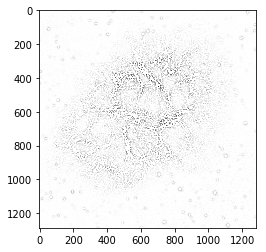

In [15]:
a = plt.imshow(r, cmap="gray")

In [21]:
new_name = path +  'after_crop.jpg'
new_name

'/home/agung/PythonProject/Flask/photographite_backend/media/temp/Agung/after_crop.jpg'

In [25]:
imageio.imwrite(new_name, r)